## Funciones de distribución de probabilidades

### Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
np.random.seed(1997)

In [5]:
a=1
b=30
n=1000000
data= np.random.uniform(a,b,n)

(array([ 99979., 100248.,  99627., 100122.,  99764.,  99931.,  99853.,
        100121., 100021., 100334.]),
 array([ 1.00001915,  3.90001676,  6.80001437,  9.70001198, 12.6000096 ,
        15.50000721, 18.40000482, 21.30000243, 24.20000005, 27.09999766,
        29.99999527]),
 <BarContainer object of 10 artists>)

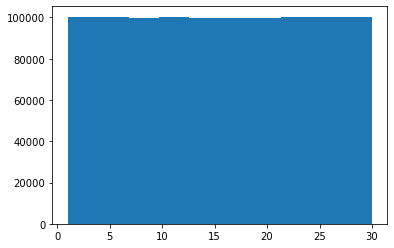

In [8]:
%matplotlib inline
plt.hist(data)

### Distribución normal

In [10]:
#genera una distribución normal estandar
data=np.random.randn(1000000)

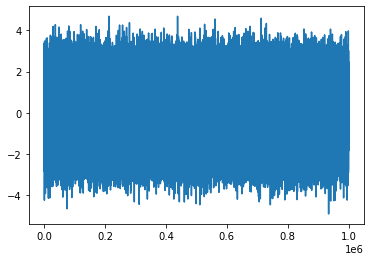

In [11]:
x=range(1,1000001)
plt.plot(x,data)

(array([4.60000e+01, 1.45500e+03, 2.02720e+04, 1.22537e+05, 3.13712e+05,
        3.44826e+05, 1.61884e+05, 3.24620e+04, 2.71100e+03, 9.50000e+01]),
 array([-4.89333435, -3.93565811, -2.97798188, -2.02030564, -1.06262941,
        -0.10495318,  0.85272306,  1.81039929,  2.76807553,  3.72575176,
         4.683428  ]),
 <BarContainer object of 10 artists>)

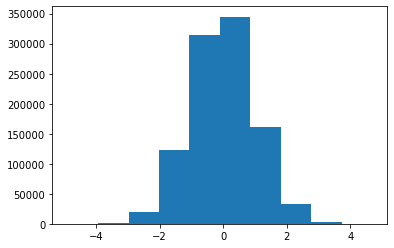

In [12]:
plt.hist(data)

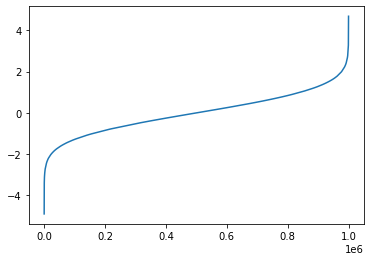

In [13]:
plt.plot(x,sorted(data))

* Z = (x - m)/sd -> N(0,1)
* x= m + sd * z

In [14]:
m=5.5
sd=2.5
z=np.random.randn(10000)
data=m+sd*z

(array([1.400e+01, 1.890e+02, 8.400e+02, 2.256e+03, 3.166e+03, 2.344e+03,
        9.680e+02, 1.960e+02, 2.400e+01, 3.000e+00]),
 array([-3.83423967, -1.79082282,  0.25259403,  2.29601088,  4.33942772,
         6.38284457,  8.42626142, 10.46967827, 12.51309512, 14.55651196,
        16.59992881]),
 <BarContainer object of 10 artists>)

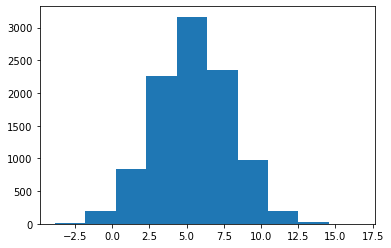

In [15]:
plt.hist(data)

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [17]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1412719999999994


(3.1412719999999994, [<matplotlib.lines.Line2D at 0x7fcf824fed00>])

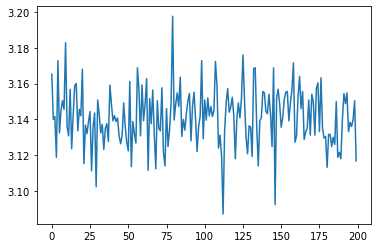

In [18]:
pi_montecarlo(10000,200)

## Dummy Data Sets

In [19]:
n=1000000
data= pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)

In [20]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.002933,1.501806,18.508995
std,1.000366,2.498955,7.793585
min,-4.559360,-11.135348,5.000058
25%,-0.671346,-0.184002,11.761311
50%,0.002578,1.503219,18.507182
75%,0.676255,3.187540,25.266712
max,5.062044,13.941614,31.999955


(array([1.46000e+02, 3.99300e+03, 4.28610e+04, 1.90597e+05, 3.60557e+05,
        2.88894e+05, 9.78200e+04, 1.42080e+04, 8.94000e+02, 3.00000e+01]),
 array([-4.55936021, -3.59721978, -2.63507934, -1.67293891, -0.71079847,
         0.25134196,  1.2134824 ,  2.17562283,  3.13776327,  4.0999037 ,
         5.06204414]),
 <BarContainer object of 10 artists>)

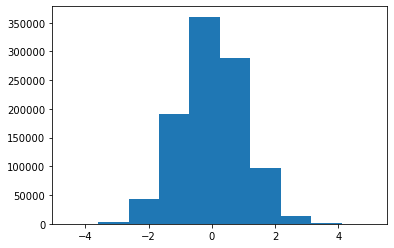

In [21]:
plt.hist(data['A'])

(array([2.90000e+01, 1.09600e+03, 1.91670e+04, 1.28415e+05, 3.35491e+05,
        3.48251e+05, 1.43014e+05, 2.30490e+04, 1.45900e+03, 2.90000e+01]),
 array([-11.13534815,  -8.62765196,  -6.11995578,  -3.6122596 ,
         -1.10456342,   1.40313276,   3.91082894,   6.41852513,
          8.92622131,  11.43391749,  13.94161367]),
 <BarContainer object of 10 artists>)

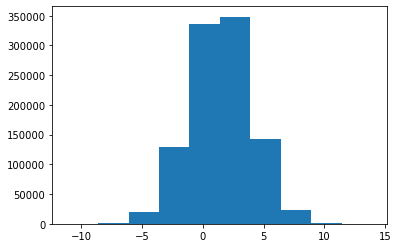

In [22]:
plt.hist(data['B'])

(array([ 99453., 100115.,  99950., 100218., 100003.,  99837.,  99807.,
        100355., 100250., 100012.]),
 array([ 5.0000579 ,  7.70004766, 10.40003742, 13.10002718, 15.80001694,
        18.5000067 , 21.19999646, 23.89998622, 26.59997598, 29.29996573,
        31.99995549]),
 <BarContainer object of 10 artists>)

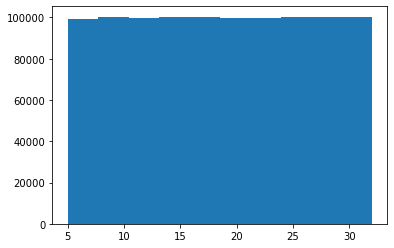

In [23]:
plt.hist(data['C'])

In [24]:
mainpath="/Volumes/Developer/Study/Udemy/Machine Learning/python-ml-course/datasets"
filename="customer-churn-model/Customer Churn Model.txt"
fullpath= os.path.join(mainpath, filename)

In [25]:
data = pd.read_csv(fullpath)

In [26]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [27]:
column_names =data.columns.values.tolist()

In [28]:
a=len(column_names)
a

21

In [29]:
new_data = pd.DataFrame(
    {
        'Column Names': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    },
    index=range(42,42+a)
)

In [30]:
new_data


,Column Names,A,B
42,State,0.032864,0.565444
43,Account Length,-0.194109,0.255803
44,Area Code,1.022818,0.841693
45,Phone,-0.716371,0.758632
46,Int'l Plan,-0.491815,0.074840
47,VMail Plan,0.254792,0.074446
48,VMail Message,-1.286209,0.798788
49,Day Mins,2.154308,0.014699
50,Day Calls,0.710162,0.433972
51,Day Charge,1.088238,0.054370
